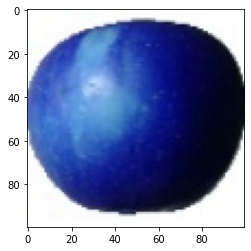

Types of fruits found:  7


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

#loading images from path
DATADIR = 'D:/archivefruit/fruits-360_dataset/fruits-360/Training'
CATEGORIES = ["Apple Braeburn","Avocado","Banana","Blueberry","Guava","Kiwi","Orange"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #,cv2.IMREAD_GRAYSCALE
        plt.imshow(img_array)
        plt.show()
        break
    break
#print (room_types)  #what kinds of rooms are in this dataset

print("Types of fruits found: ", len(CATEGORIES))

In [2]:
IMG_SIZE = 100
batch_size = 100
img_height = 100
img_width = 100

In [3]:
#building our training data
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do fruits

        path = os.path.join(DATADIR,category)  # create path to fruits
        class_num = CATEGORIES.index(category)  # get the classification  (0 ,1,2,3,4,5,6) different number donate different category of fruit

        for img in tqdm(os.listdir(path)):  # iterate over each image per fruits
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass        

create_training_data()

image_count = len(training_data)

100%|██████████| 479/479 [00:05<00:00, 92.17it/s] 


In [4]:
# Build a dataframe        
fruits_df = pd.DataFrame(data=training_data, columns=['fruits type', 'image'])
#print(rooms_df.head())
#print(rooms_df.tail())

# Let's check how many samples for each category are present
print("Total number of fruits in the dataset: ", len(fruits_df))

fruits_count = fruits_df['fruits type'].value_counts()

#print("fruits in each category: ")
#print(fruit_count)

In [5]:
#Assigning labels and features
X =[]
y =[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

#creating own model
#Normalising X and converting labels to categorical data
X = X.astype('float32')
X /= 255
Y = np_utils.to_categorical(y,7)
print(Y[100])
print(shape(Y))

In [6]:
# Transform the image array to a numpy type
X = np.array(X)
X.shape 

(3306, 100, 100, 1)

In [7]:
#creating own model
#Normalising X and converting labels to categorical data
from keras.utils import np_utils
X = X.astype('float32')
X /= 255
Y = np_utils.to_categorical(y,7)
print(Y[100])
print(Y.shape)

[1. 0. 0. 0. 0. 0. 0.]
(3306, 7)


In [8]:
X = np.array(X)
y=np.array(y)

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, Y = shuffle(X, Y, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2314, 100, 100, 1)
(2314, 7)
(992, 100, 100, 1)
(992, 7)


In [10]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [11]:
# x is input, y=F(x)
# identity block simply means input should be equal to output. 
#  y = x + F(x)   the layers in a traditional network are learning the true output H(x)
# F(x) = y - x   the layers in a residual network are learning the residual F(x)
# Hence, the name: Residual Block.
def identity_block(A, f, filters, stage, block):
    """ 
    Arguments:
    A -- input of shape (m, height, width, channel)
    f -- shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    A -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """  
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Saving the input value.we need this later to add to the output. 
    A_shortcut = A
     # First component of main path
    A = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(A)
    A = BatchNormalization(axis = 3, name = bn_name_base + '2a')(A)
    A = Activation('relu')(A)
    
    # Second component of main path (≈3 lines)
    A = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(A)
    A = BatchNormalization(axis = 3, name = bn_name_base + '2b')(A)
    A = Activation('relu')(A)

    # Third component of main path (≈2 lines)
    A = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(A)
    A = BatchNormalization(axis = 3, name = bn_name_base + '2c')(A)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    A = Add()([A, A_shortcut])
    A = Activation('relu')(A)    
    
    return A

In [12]:
def convolutional_block(A, f, filters, stage, block, s = 2):  
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch' 
    # Retrieve Filters
    F1, F2, F3 = filters  
    # Save the input value
    A_shortcut = A
    # First layer 
    A = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(A) # 1,1 is filter size
    A = BatchNormalization(axis = 3, name = bn_name_base + '2a')(A)  # normalization on channels
    A = Activation('relu')(A)   
    # Second layer  (f,f)=3*3 filter by default
    A = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(A)
    A = BatchNormalization(axis = 3, name = bn_name_base + '2b')(A)
    A = Activation('relu')(A)
    # Third layer
    A = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(A)
    A = BatchNormalization(axis = 3, name = bn_name_base + '2c')(A)
     ##### SHORTCUT PATH #### 
    A_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(A_shortcut)
    A_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(A_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation 
    A = Add()([A, A_shortcut])
    A = Activation('relu')(A)
       
    return A

In [13]:
#creating Resnet 50
#Each ResNet block is either 2 layer deep
def ResNet50(input_shape=(100,100,1), classes=7):
    """
    Implementation of the ResNet50 architecture:
    CONV2D -> BATCHNORM -> RELU -> MAAPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    """
    # Define the input as a tensor with shape input_shape
    A_input = Input(input_shape)
    # Zero-Padding
    A = ZeroPadding2D((3, 3))(A_input) #3,3 padding
    # Stage 1
    A = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(A) #64 filters of 7*7 
    A = BatchNormalization(axis=3, name='bn_conv1')(A) #batchnorm applied on channels
    A = Activation('relu')(A)
    A = MaxPooling2D((3, 3), strides=(2, 2))(A) #window size is 3*3
    # Stage 2
    A = convolutional_block(A, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    # convolutional_block is a function defined above. Convolutional_block have 3 layers.
    #filters=[64, 64, 256] first 64 is for 1st layer and 2nd 64 is for 2nd layer and 256 is for 3rd layer of convultional block   
    # below are the conv layers from convolutional_block function
    #A = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(A)
    #A = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(A)
    #A = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '2a')(A)
    A = identity_block(A, 3, [64, 64, 256], stage=2, block='b') 
    #A = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(A)
    #A = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(A)
    #A = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(A) 
    A = identity_block(A, 3, [64, 64, 256], stage=2, block='c')
    #A = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(A)
    #A = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(A)
    #A = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(A)
    ### START CODE HERE ###
    # Stage 3 
    A = convolutional_block(A, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    A = identity_block(A, 3, [128, 128, 512], stage=3, block='b')
    A = identity_block(A, 3, [128, 128, 512], stage=3, block='c')
    A = identity_block(A, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 
    A = convolutional_block(A, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    A = identity_block(A, 3, [256, 256, 1024], stage=4, block='b')
    A = identity_block(A, 3, [256, 256, 1024], stage=4, block='c')
    A = identity_block(A, 3, [256, 256, 1024], stage=4, block='d')
    A = identity_block(A, 3, [256, 256, 1024], stage=4, block='e')
    A = identity_block(A, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 
    A = convolutional_block(A, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    A = identity_block(A, 3, [512, 512, 2048], stage=5, block='b')
    A = identity_block(A, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL 
    A = AveragePooling2D((2,2), name="avg_pool")(A)
     ### END CODE HERE ###
    # output layer
    A = Flatten()(A)
    A = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(A)    
    # Create model
    model = Model(inputs = A_input, outputs = A, name='ResNet50')

    return model

In [14]:
model = ResNet50(input_shape = (100,100,1), classes = 7)

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 1)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 50, 50, 64)   3200        ['zero_padding2d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1[0][0]']           

 res2c_branch2c (Conv2D)        (None, 24, 24, 256)  16640       ['activation_8[0][0]']           
                                                                                                  
 bn2c_branch2c (BatchNormalizat  (None, 24, 24, 256)  1024       ['res2c_branch2c[0][0]']         
 ion)                                                                                             
                                                                                                  
 add_2 (Add)                    (None, 24, 24, 256)  0           ['bn2c_branch2c[0][0]',          
                                                                  'activation_6[0][0]']           
                                                                                                  
 activation_9 (Activation)      (None, 24, 24, 256)  0           ['add_2[0][0]']                  
                                                                                                  
 res3a_bra

                                                                  'activation_15[0][0]']          
                                                                                                  
 activation_18 (Activation)     (None, 12, 12, 512)  0           ['add_5[0][0]']                  
                                                                                                  
 res3d_branch2a (Conv2D)        (None, 12, 12, 128)  65664       ['activation_18[0][0]']          
                                                                                                  
 bn3d_branch2a (BatchNormalizat  (None, 12, 12, 128)  512        ['res3d_branch2a[0][0]']         
 ion)                                                                                             
                                                                                                  
 activation_19 (Activation)     (None, 12, 12, 128)  0           ['bn3d_branch2a[0][0]']          
          

 bn4c_branch2a (BatchNormalizat  (None, 6, 6, 256)   1024        ['res4c_branch2a[0][0]']         
 ion)                                                                                             
                                                                                                  
 activation_28 (Activation)     (None, 6, 6, 256)    0           ['bn4c_branch2a[0][0]']          
                                                                                                  
 res4c_branch2b (Conv2D)        (None, 6, 6, 256)    590080      ['activation_28[0][0]']          
                                                                                                  
 bn4c_branch2b (BatchNormalizat  (None, 6, 6, 256)   1024        ['res4c_branch2b[0][0]']         
 ion)                                                                                             
                                                                                                  
 activatio

                                                                                                  
 res4f_branch2c (Conv2D)        (None, 6, 6, 1024)   263168      ['activation_38[0][0]']          
                                                                                                  
 bn4f_branch2c (BatchNormalizat  (None, 6, 6, 1024)  4096        ['res4f_branch2c[0][0]']         
 ion)                                                                                             
                                                                                                  
 add_12 (Add)                   (None, 6, 6, 1024)   0           ['bn4f_branch2c[0][0]',          
                                                                  'activation_36[0][0]']          
                                                                                                  
 activation_39 (Activation)     (None, 6, 6, 1024)   0           ['add_12[0][0]']                 
          

 add_15 (Add)                   (None, 3, 3, 2048)   0           ['bn5c_branch2c[0][0]',          
                                                                  'activation_45[0][0]']          
                                                                                                  
 activation_48 (Activation)     (None, 3, 3, 2048)   0           ['add_15[0][0]']                 
                                                                                                  
 avg_pool (AveragePooling2D)    (None, 1, 1, 2048)   0           ['activation_48[0][0]']          
                                                                                                  
 flatten (Flatten)              (None, 2048)         0           ['avg_pool[0][0]']               
                                                                                                  
 fc7 (Dense)                    (None, 7)            14343       ['flatten[0][0]']                
          

In [32]:
import tensorflow as tf
model.fit(train_x, train_y, batch_size = 32, verbose=1,epochs =5,validation_split = 0.3, callbacks=[tf.keras.callbacks.CSVLogger('hisr.csv')]) 

Epoch 1/5
51/51 [==============================] - 171s 3s/step - loss: 0.0058 - accuracy: 0.9994 - val_loss: 1.9493 - val_accuracy: 0.4978
Epoch 2/5
51/51 [==============================] - 176s 3s/step - loss: 1.5263e-04 - accuracy: 1.0000 - val_loss: 1.8122 - val_accuracy: 0.5655
Epoch 3/5
51/51 [==============================] - 175s 3s/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.9730 - val_accuracy: 0.7252
Epoch 4/5
51/51 [==============================] - 167s 3s/step - loss: 0.0109 - accuracy: 0.9975 - val_loss: 0.2738 - val_accuracy: 0.8676
Epoch 5/5
51/51 [==============================] - 171s 3s/step - loss: 0.0242 - accuracy: 0.9944 - val_loss: 0.4351 - val_accuracy: 0.8719


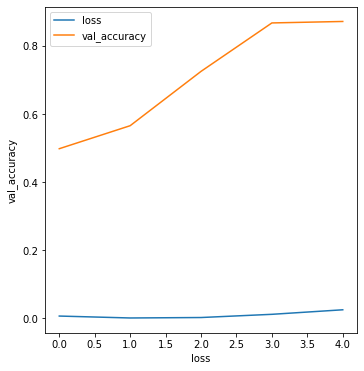

In [36]:
#Evaluate the Model
history = pd.read_csv('hisr.csv') 
history.head()
plt.figure(figsize=(19,6))
plt.subplot(131)
plt.plot(history.epoch, history.loss, label="loss")
plt.plot(history.epoch, history.val_accuracy, label="val_accuracy")
plt.xlabel('loss')
plt.ylabel('val_accuracy')
plt.legend()

In [37]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]*100),'%')

31/31 [==============================] - 19s 608ms/step - loss: 0.5976 - accuracy: 0.8296
Loss = 0.5975714921951294
Test Accuracy = 82.96371102333069 %


In [38]:
#observing its classification report and confusion matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

31/31 [==============================] - 20s 636ms/step


import keras.utils as image
from matplotlib.pyplot import imread
img_path = 'banana.jpeg'
img = image.load_img(img_path, target_size=(100, 100, 1))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
my_image = imread(img_path)
imshow(my_image)
print(model.predict(x))

In [41]:
test_y_arg=np.argmax(test_y,axis=1)
Y_pred = np.argmax(model.predict(test_x),axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_y_arg, Y_pred))

31/31 [==============================] - 19s 624ms/step
Confusion Matrix
[[136   0   0   0   0   0   0]
 [  0 127   0   0   0   0   0]
 [  0   0 151   0   0   0   0]
 [  0   0   0 135   0   0   0]
 [  0   0   0   0 138   3   0]
 [  0   0   0   0   0 136   0]
 [  0   0   0   0   0 166   0]]


In [42]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(test_y_arg, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00       135
           4       1.00      0.98      0.99       141
           5       0.45      1.00      0.62       136
           6       0.00      0.00      0.00       166

    accuracy                           0.83       992
   macro avg       0.78      0.85      0.80       992
weighted avg       0.76      0.83      0.78       992



C:\Users\divya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
